In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
party_colors = {
    'SPD': 'tab:red',
    'CDU': 'black',
    'AfD': 'tab:blue',
    'FDP': 'gold',
    'Bündnis 90/Die Grünen': 'tab:green',
    'Die Linke': 'tab:purple',
    'CSU': 'tab:cyan',
    'Fraktionslos': 'tab:gray'
}

start_end_date = [['01/1/2020','01/31/2020'],
                  ['02/1/2020', '02/29/2020'],
                  ['03/1/2020', '03/31/2020'],
                  ['04/1/2020', '04/30/2020'],
                  ['05/1/2020', '05/31/2020'],
                  ['06/1/2020', '06/30/2020'],
                  ['07/1/2020', '07/31/2020'],
                  ['08/1/2020', '08/31/2020'],
                  ['09/1/2020', '09/30/2020'],
                  ['10/1/2020', '10/31/2020'],
                  ['11/1/2020', '11/30/2020'],
                  ['12/1/2020', '12/31/2020'],]


heidenelkenrot = '#9C004B'
df_annotation = pd.read_csv('../dataset_description/annotation/covid_tweets_annotation.csv')
df = pd.DataFrame(df_annotation)

def get_plot(data, dates):
    plt.figure(figsize=(25,8))
    sns.barplot(data.index, data.values, alpha=0.8, color=heidenelkenrot)
    plt.ylabel('Count', fontsize=17)
    plt.xlabel('Content', fontsize=17)
    plt.tick_params(labelsize=17)

def get_plot_parties(data, dates):
    fig, ax = plt.subplots(figsize=(25,8))
    sns.barplot(x='annotation_qualifier', y='count', hue='party', data=data, palette=party_colors)
    plt.ylabel('Count', fontsize=17)
    plt.xlabel('Content', fontsize=17)
    plt.tick_params(labelsize=17)
    plt.show()


In [169]:
import json
TWEETS = '../filtered_data/covid_tweets_by_politician'

def get_politicians_list():
    with open('../../assets/all_politicians.json', 'r', encoding='utf-8') as infile:
        politicians_list = []
        f_content = json.load(infile)
        politicians_list = [p for p in f_content]
        return politicians_list
politicians = get_politicians_list()

def get_party(screen_name):
    for p in politicians:
        if str(p['screen_name']) == str(screen_name):
            return p['Partei']

dates = []

def read_tweets(tweet_id):
    for entry in politicians:
        f_path = TWEETS + '/' + entry['screen_name'] + '.json' 
        if os.path.isfile(f_path):
            with open(f_path, 'r', encoding='utf-8') as infile:
                f_content = json.load(infile)
                if f_content != []:
                    for tweet in f_content: 
                        if str(tweet_id) == str(tweet.get('id_')):
                            dates.append(tweet.get('raw_data').get('created_at'))
                            return get_party(entry['screen_name'])


def get_relevant_informations(df):
    parties_list = []
    for index, row in df.iterrows():
        parties_list.append(read_tweets(row['tweet_id']))
    df['party'] = parties_list
    df['date'] = dates
    df.to_csv(r'annotations_with_dates_and_parties.csv')
    return df


def filter_rows_by_values(df, col, values, boolean):
    return df[df[col].isin(values) == boolean]



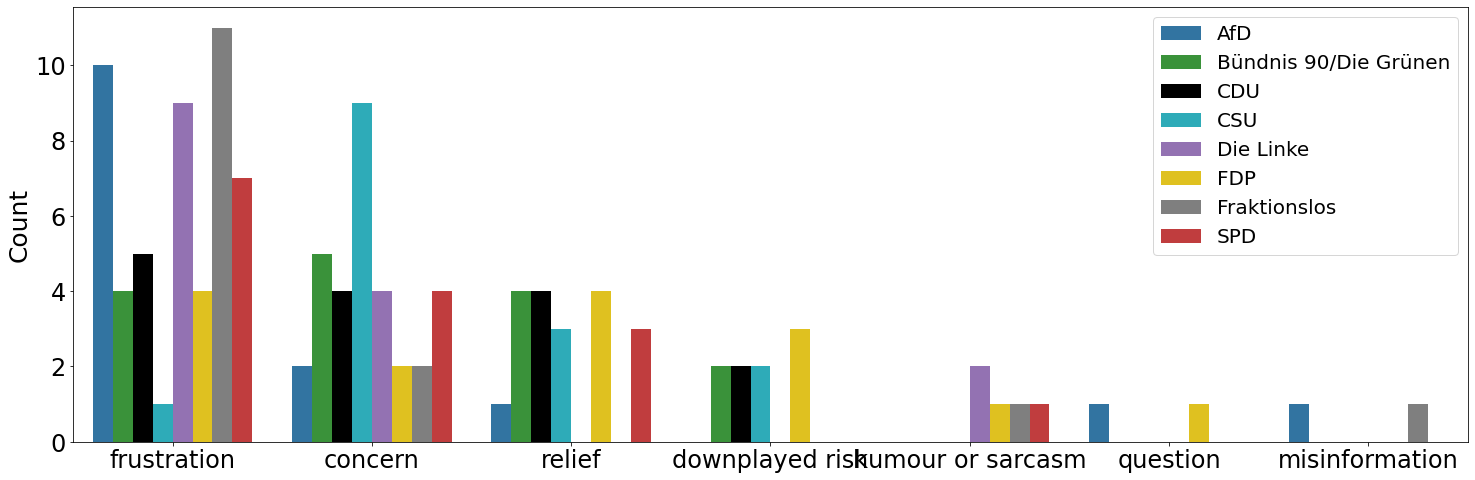

In [170]:

# All data

df_copy = df_annotation.copy()
df_copy = df_copy.drop(['link', 'tweet_content', 'annotation_sentiment', 'annotation_emotion'], axis='columns')
df_copy = get_relevant_informations(df_copy)
df_copy = df_copy.drop(['tweet_id', 'date'], axis='columns')
annotations = ((df_copy['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
df_relevant_columns = df_copy.groupby(['party'])['annotation_qualifier'].value_counts(sort=True, ascending=False).unstack().fillna(0)
df_relevant_columns = df_relevant_columns.rename_axis(None, axis=1)
data_annotation = df_relevant_columns.reset_index().melt(id_vars=['party'], value_vars=annotations, var_name='annotation_qualifier', value_name='count')
fig, ax = plt.subplots(figsize=(25,8))
sns.barplot(x='annotation_qualifier', y='count', hue='party', data=data_annotation, palette=party_colors)
plt.ylabel('Count', fontsize=25)
plt.xlabel('', fontsize=2)
plt.tick_params(labelsize=24)
plt.legend(prop={'size': 20})
plt.show()

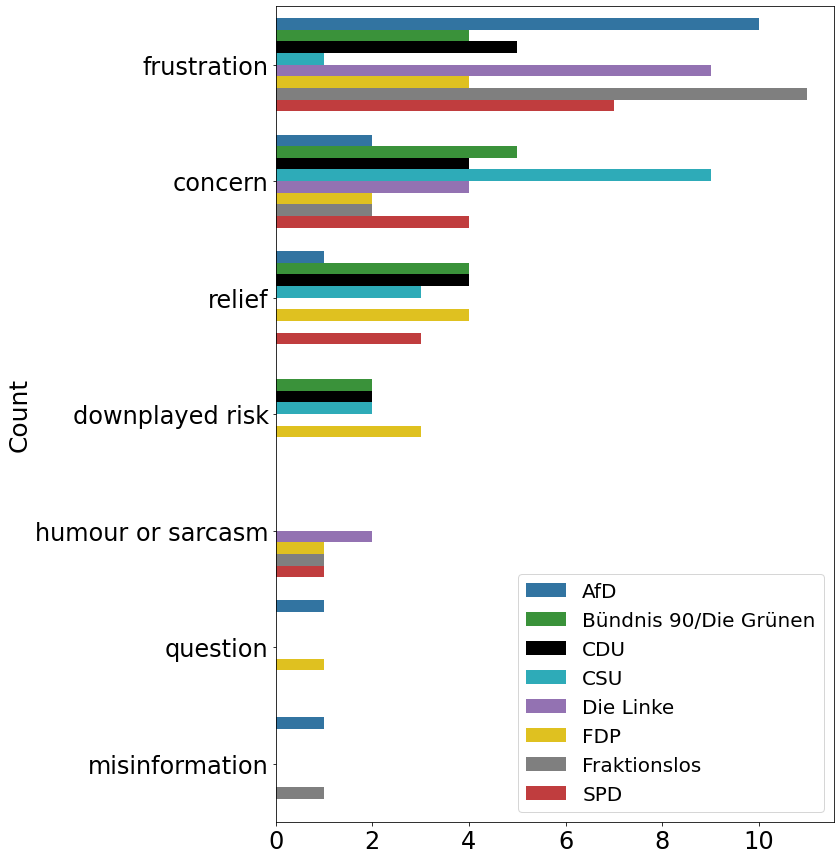

In [171]:
# All data
df_annotation = pd.read_csv('annotations_with_dates_and_parties.csv')
df_annotation = df_annotation.drop(['tweet_id', 'date'], axis='columns')
annotations = ((df_annotation['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
df_relevant_columns = df_annotation.groupby(['party'])['annotation_qualifier'].value_counts(sort=True, ascending=False).unstack().fillna(0)
df_relevant_columns = df_relevant_columns.rename_axis(None, axis=1)
data_annotation = df_relevant_columns.reset_index().melt(id_vars=['party'], value_vars=annotations, var_name='annotation_qualifier', value_name='count')
fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x='count', y='annotation_qualifier', hue='party', data=data_annotation, palette=party_colors)
plt.ylabel('Count', fontsize=25)
plt.xlabel('', fontsize=2)
plt.tick_params(labelsize=24)
plt.legend(prop={'size': 20})
plt.show()


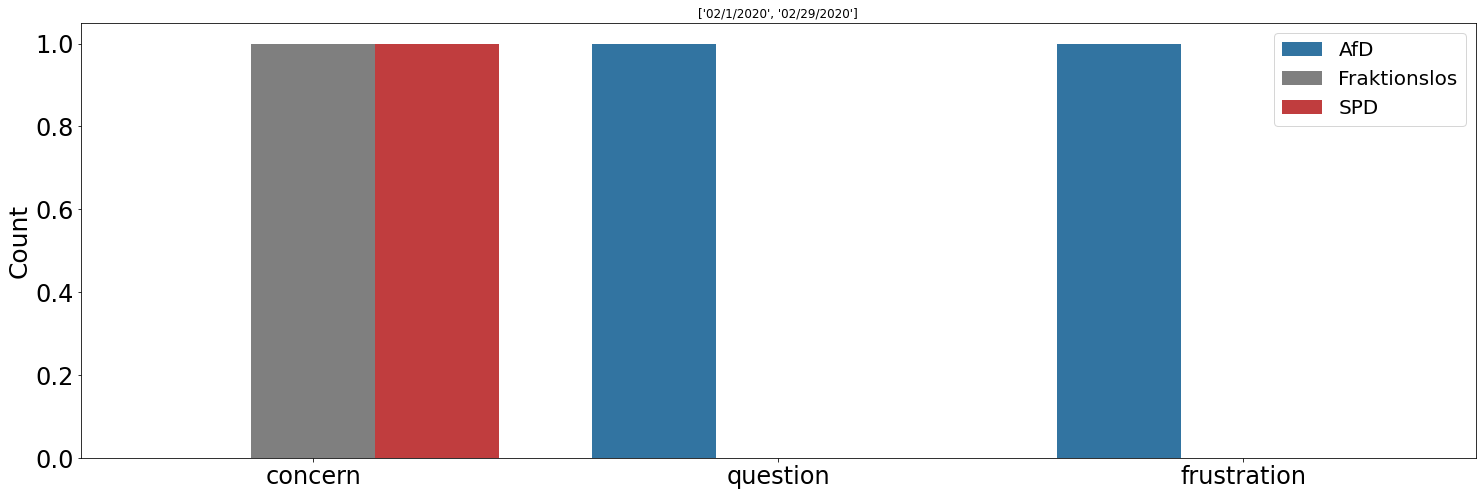

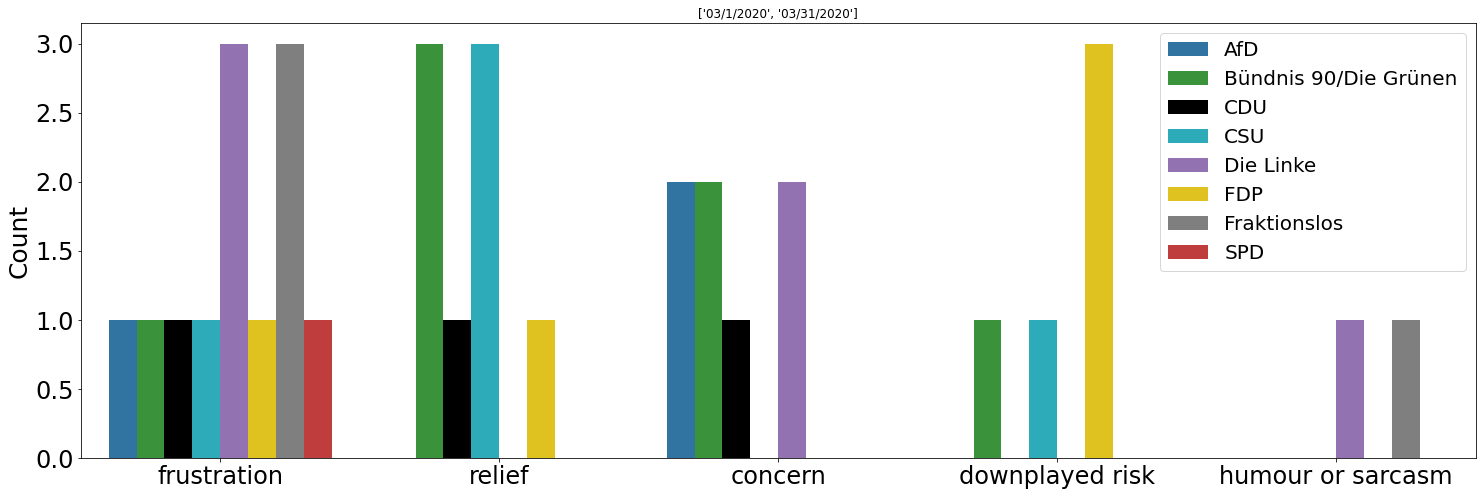

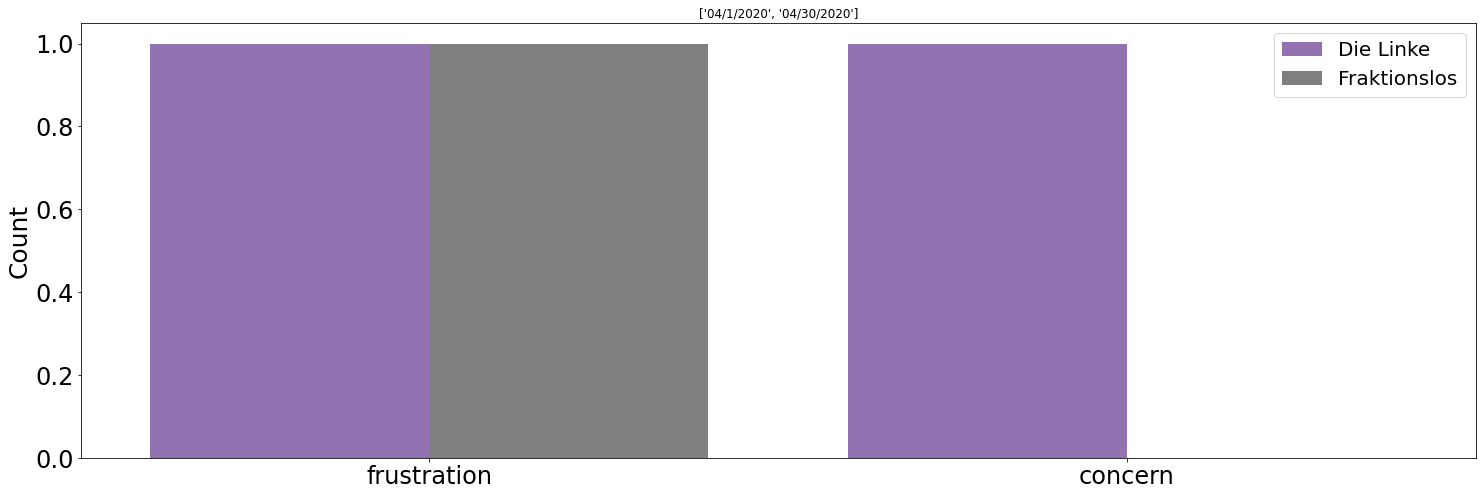

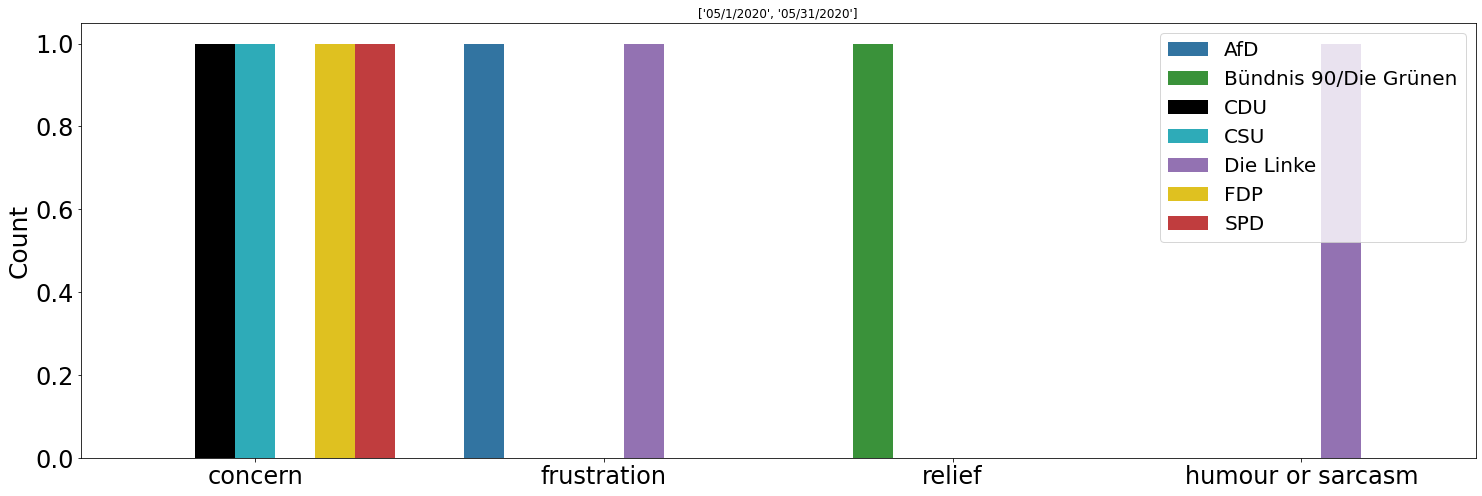

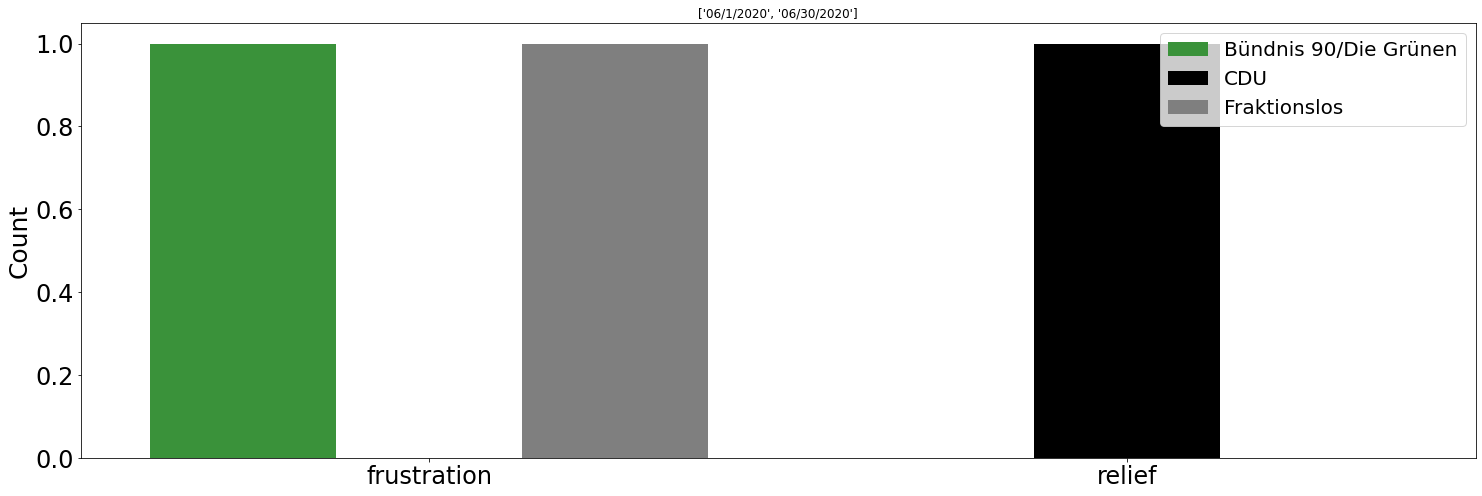

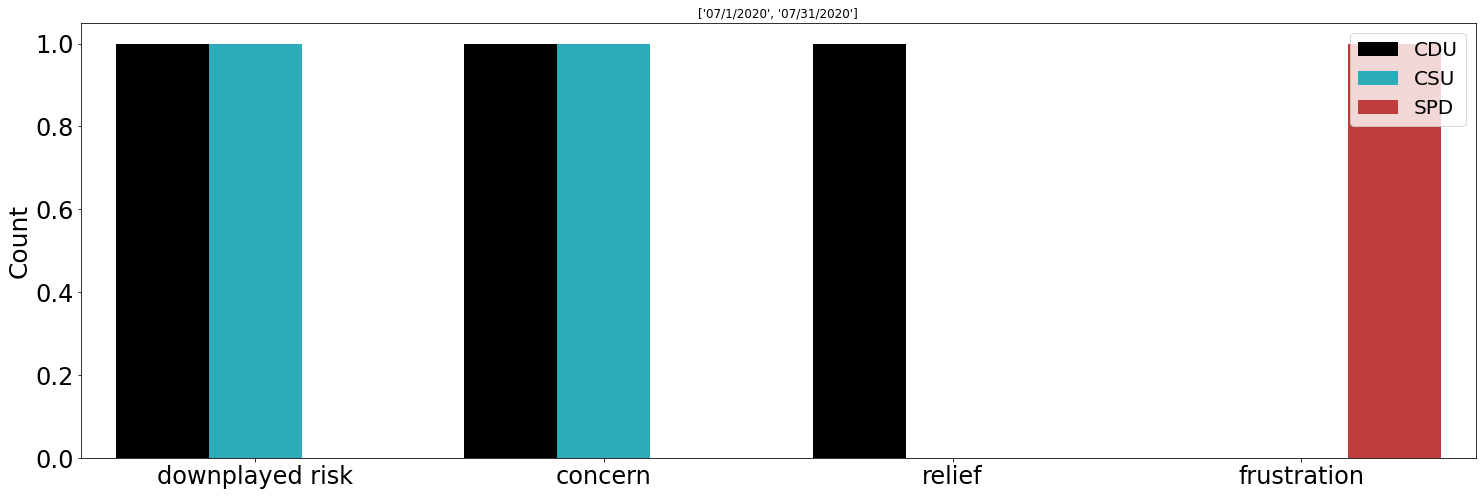

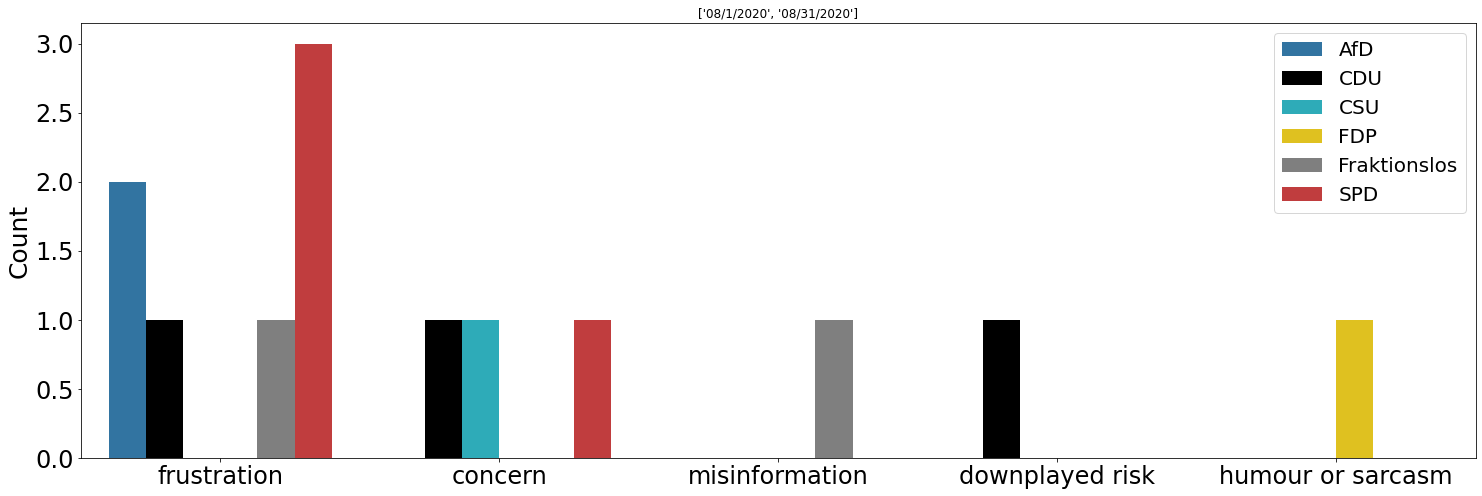

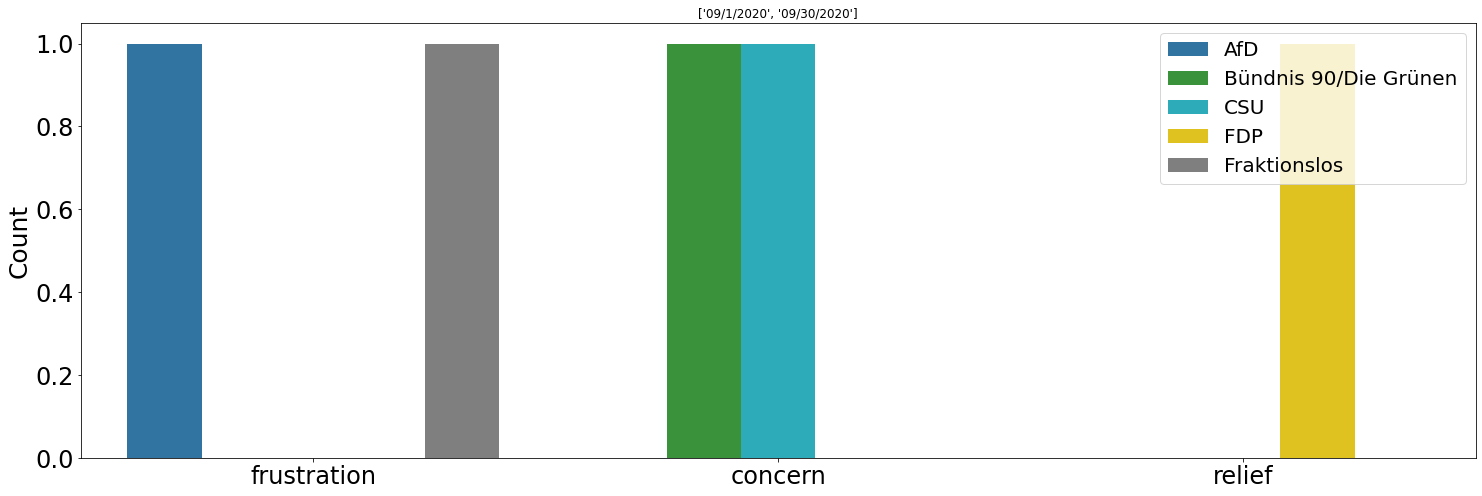

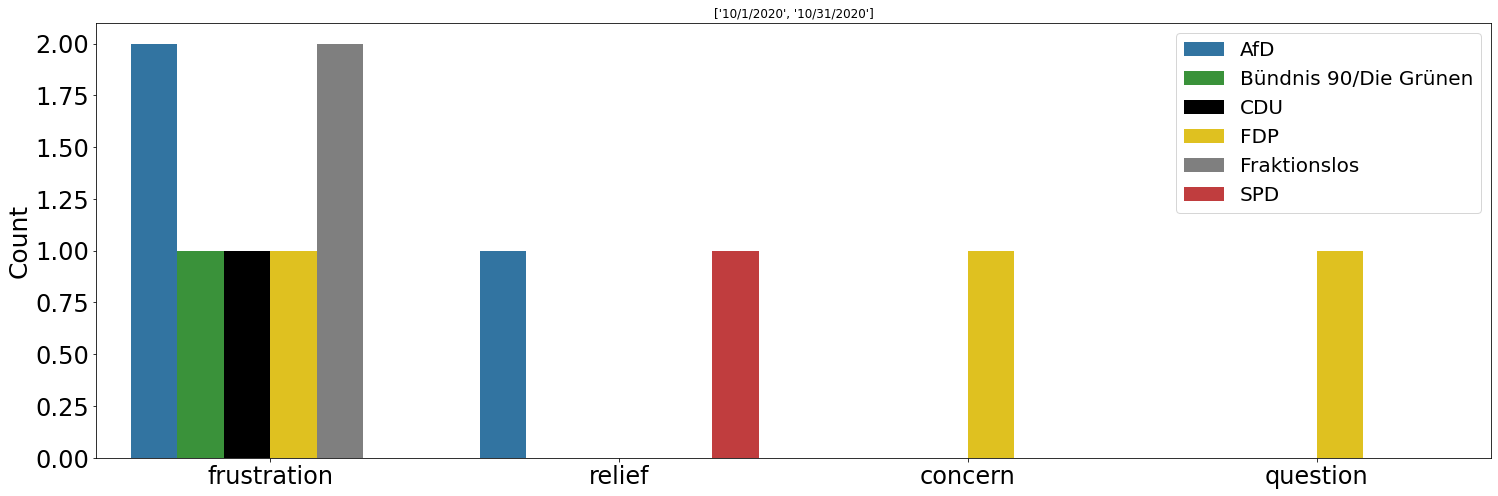

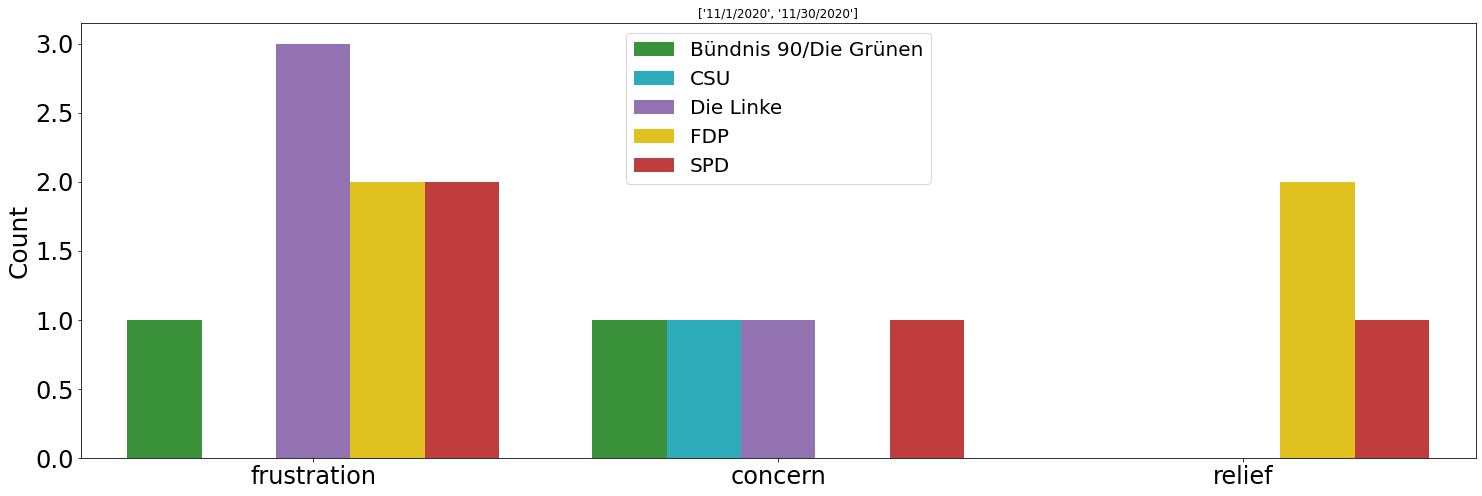

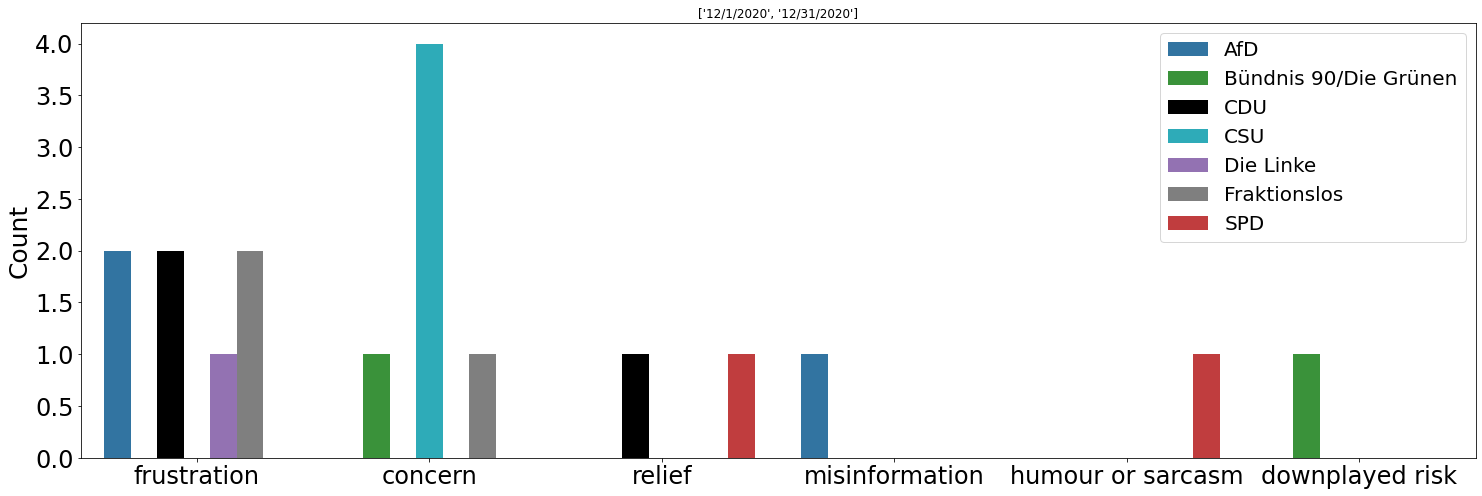

In [181]:
# All data
df_annotation = pd.read_csv('annotations_with_dates_and_parties.csv')
df_annotation = pd.DataFrame(df_annotation)
df_annotation = df_annotation.drop(['tweet_id'], axis='columns')
df_annotation['date']=pd.to_datetime(df_annotation['date'], utc= True).dt.date
for dates in start_end_date:
    df_annotations_per_month = df_annotation.loc[(df_annotation['date'] >= pd.to_datetime(dates[0], utc= True)) & (df_annotation['date'] <= pd.to_datetime(dates[1], utc=True))]
    if not df_annotations_per_month.empty:
        df_relevant_columns = df_annotations_per_month.drop('date', axis='columns')
        annotations = ((df_relevant_columns['annotation_qualifier'].value_counts(sort=True, ascending=False))).index.to_list()
        df_relevant_columns = df_relevant_columns.groupby(['party'])['annotation_qualifier'].value_counts(sort=True, ascending=False).unstack().fillna(0)
        df_relevant_columns = df_relevant_columns.rename_axis(None, axis=1)
        data_annotation = df_relevant_columns.reset_index().melt(id_vars=['party'], value_vars=annotations, var_name='annotation_qualifier', value_name='count')
        fig, ax = plt.subplots(figsize=(25,8))
        sns.barplot(x='annotation_qualifier', y='count', hue='party', data=data_annotation, palette=party_colors)
        plt.title(dates)
        plt.ylabel('Count', fontsize=25)
        plt.xlabel('', fontsize=2)
        plt.tick_params(labelsize=24)
        plt.legend(prop={'size': 20})
        plt.show()